#### Install Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# Define path for data
loan_data_path = "data/loan_data.csv"

# Read the data file

loan_data = pd.read_csv(loan_data_path)

In [3]:
# Display the data table
loan_data.head(20)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


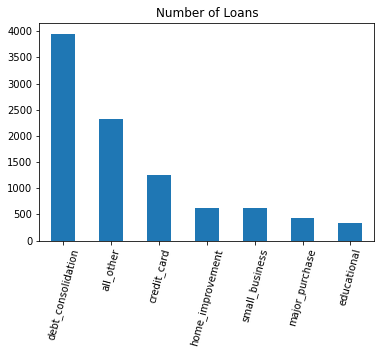

In [4]:
# Calculate the number of loans for each Loan type

loan_numbers = loan_data["purpose"].value_counts()

# Create a barplot to show the loan numbers
numbers_plot = loan_numbers.plot.bar(title = "Number of Loans", rot = 75)

### Identify Credit Score Distribution

In [6]:
# Define credit score ranges
credit_scores = [0, 649, 699, 749, 850]

# Define the credit score bins
score_bins = ["Bad (<650)", "Needs Improvement (<700)", "Good (<750)", "Great (>750)"]

# Sort the credit scores into their Score Bin
loan_data["Credit_Score"]= pd.cut(loan_data["fico"], credit_scores, labels= score_bins)
credit_score = loan_data.groupby("fico")



,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Credit_Score
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,Good (<750)
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,Good (<750)
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,Needs Improvement (<700)
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,Good (<750)
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,Needs Improvement (<700)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7913,0,debt_consolidation,0.1628,99.71,11.002100,4.22,622,479.000000,2581,64.5,10,0,0,0,Bad (<650)
7957,0,debt_consolidation,0.1786,88.41,10.915088,9.62,612,1230.000000,1190,119.0,15,0,0,0,Bad (<650)
7979,0,all_other,0.1438,30.93,10.275051,3.10,632,420.041667,997,7.3,4,0,0,1,Bad (<650)
8075,0,all_other,0.1343,27.13,10.165852,0.00,637,540.041667,0,0.0,2,0,0,1,Bad (<650)


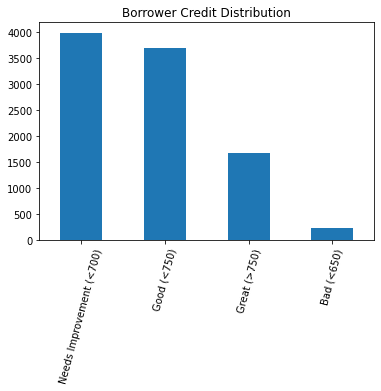

In [7]:
# Count the number of borrowers per scoring bin
borrower_credit = loan_data["Credit_Score"].value_counts()

# Create a barplot to show the loan numbers
credit_plot = borrower_credit.plot.bar(title = "Borrower Credit Distribution", rot = 75)
